# Practice Case: Time Series Analysis
## Astra Data Scientist Bootcamp

#### Presented by: Zumarsiyah Mahsyari

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

# Load & Read Data

In [2]:
df = pd.read_csv("C:/Users/zumars064124/Documents/ADSB 2/ASTRA-Time-Series-Analysis-Sales-Forecasting-master/tute1.csv")
df.head()

,Unnamed: 0,Sales,AdBudget,GDP
0,Mar-81,1020.2,659.2,251.8
1,Jun-81,889.2,589.0,290.9
2,Sep-81,795.0,512.5,290.8
3,Dec-81,1003.9,614.1,292.4
4,Mar-82,1057.7,647.2,279.1


# Data Preparation

In [3]:
df = df.rename(columns = {'Unnamed: 0': 'Date'})
df.head()

,Date,Sales,AdBudget,GDP
0,Mar-81,1020.2,659.2,251.8
1,Jun-81,889.2,589.0,290.9
2,Sep-81,795.0,512.5,290.8
3,Dec-81,1003.9,614.1,292.4
4,Mar-82,1057.7,647.2,279.1


In [4]:
year = []
month = []

for i in df['Date']:
    y = i.split('-')[1]
    month.append(i.split('-')[0])
    if y[0] != '0':
        year.append('19'+y)
    else:
        year.append('20'+y)

In [5]:
df['Date'] = pd.to_datetime(['{}-{}-01'.format(y,m) for y,m in zip(year, month)])
data = df.set_index(['Date'])

In [6]:
from datetime import datetime
data.head()

,Sales,AdBudget,GDP
Date,,,
1981-03-01,1020.2,659.2,251.8
1981-06-01,889.2,589.0,290.9
1981-09-01,795.0,512.5,290.8
1981-12-01,1003.9,614.1,292.4
1982-03-01,1057.7,647.2,279.1


In [7]:
sales = data['Sales']

# Stationarity Test

C:\Users\zumars064124\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


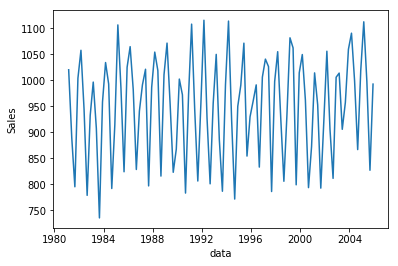

In [8]:
plt.xlabel("data")
plt.ylabel('Sales')
plt.plot(sales)

Secara visual, data penjualan terlihat stationer dalam rataan tapi tidak stationer dalam ragam.

In [9]:
rolmean = sales.rolling(window = 4).mean()
rolstd = sales.rolling(window = 4).std()
print(rolmean, rolstd)

Date
1981-03-01        NaN
1981-06-01        NaN
1981-09-01        NaN
1981-12-01    927.075
1982-03-01    936.450
               ...   
2004-12-01    993.700
2005-03-01    999.175
2005-06-01    998.800
2005-09-01    988.850
2005-12-01    982.325
Name: Sales, Length: 100, dtype: float64 Date
1981-03-01           NaN
1981-06-01           NaN
1981-09-01           NaN
1981-12-01    105.597771
1982-03-01    117.603472
                 ...    
2004-12-01     93.445278
2005-03-01    101.324540
2005-06-01    101.328673
2005-09-01    119.042919
2005-12-01    117.567552
Name: Sales, Length: 100, dtype: float64


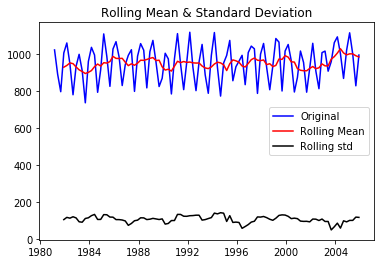

In [10]:
orig = plt.plot(sales, color = 'blue', label = 'Original')
mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolstd, color = 'black', label = 'Rolling std')
plt.legend(loc = 'best')
plt.title ('Rolling Mean & Standard Deviation')
plt.show(block = False)

Berdasarkan visualisasi di atas, dapat dilihat bahwa data tidak stationer dalam ragam maka perlu ditransformasi.

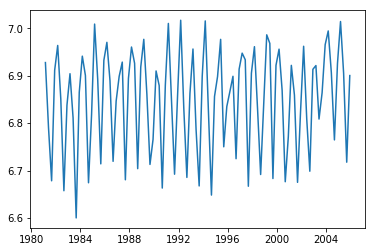

In [11]:
sales_log = np.log(sales)
plt.plot(sales_log)

In [12]:
movingAverage = sales_log.rolling(window=4).mean()
movingSTD = sales_log.rolling(window=4).std()
print(movingAverage, movingSTD)

Date
1981-03-01         NaN
1981-06-01         NaN
1981-09-01         NaN
1981-12-01    6.827016
1982-03-01    6.836041
                ...   
2004-12-01    6.898000
2005-03-01    6.902970
2005-06-01    6.902594
2005-09-01    6.890841
2005-12-01    6.884352
Name: Sales, Length: 100, dtype: float64 Date
1981-03-01         NaN
1981-06-01         NaN
1981-09-01         NaN
1981-12-01    0.116563
1982-03-01    0.127817
                ...   
2004-12-01    0.096584
2005-03-01    0.103470
2005-06-01    0.103455
2005-09-01    0.124826
2005-12-01    0.123031
Name: Sales, Length: 100, dtype: float64


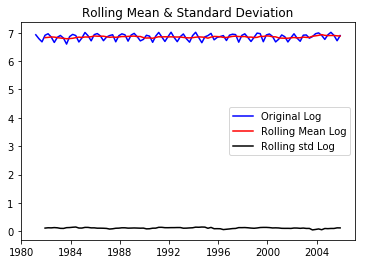

In [13]:
orig = plt.plot(sales_log, color = 'blue', label = 'Original Log')
mean = plt.plot(movingAverage, color = 'red', label = 'Rolling Mean Log')
std = plt.plot(movingSTD, color = 'black', label = 'Rolling std Log')
plt.legend(loc = 'best')
plt.title ('Rolling Mean & Standard Deviation')
plt.show(block = False)

Berdasarkan visualisasi di atas, data penjualan telah stationer dalam ragam.

In [14]:
#Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_log, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value

print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -2.944119
p-value                         0.040453
#Lags Used                      8.000000
Number of Observations Used    91.000000
Critical Value (1%)            -3.504343
Critical Value (5%)            -2.893866
Critical Value (10%)           -2.584015
dtype: float64


Uji Stationeritas dalam rataan

H0: data tidak stationer

H1: data stationer

alpha = 0,05

P-value = 0,04

Keputusan:
Karena P-value kurang dari 0,05 maka tolah H0 sehingga dapat disimpulkan bahwa data penjualan stationer dalam rataan.

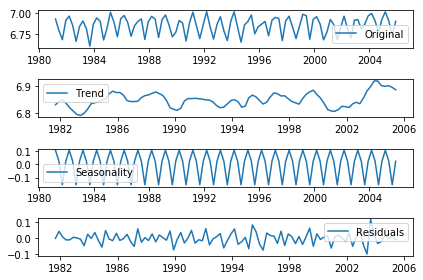

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(sales_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(sales_log, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

# ACF dan PACF

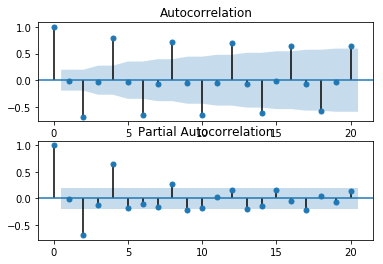

In [16]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure()
pyplot.subplot(211)
plot_acf(sales_log, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(sales_log, ax=pyplot.gca())
pyplot.show()

Berdasarkan visualisasi ACF dan PACF di atas, diketahui bahwa model time series-nya adalah ARIMA(4,0,2).

C:\Users\zumars064124\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  % freq, ValueWarning)


Plotting AR model


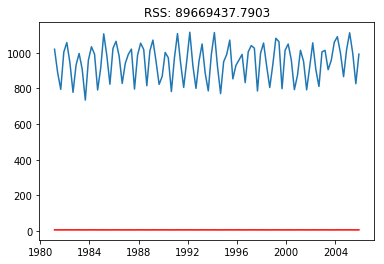

In [23]:
from statsmodels.tsa.arima_model import ARIMA

#MA model
model = ARIMA(sales_log, order = (4,0,2))
results_AR = model.fit(disp = -1)
plt.plot(sales)
plt.plot(results_AR.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-sales)**2))
print('Plotting AR model')

C:\Users\zumars064124\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 89669437.7903')

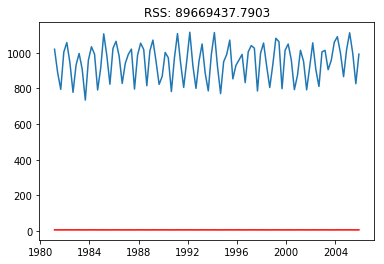

In [24]:
from statsmodels.tsa.arima_model import ARIMA

#MA model
model = ARIMA(sales_log, order = (4,0,2))
results_ARIMA = model.fit(disp = -1)
plt.plot(sales)
plt.plot(results_ARIMA.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-sales)**2))

In [25]:
predictions_ARIMA = pd.Series(results_ARIMA.fittedvalues, copy = True)
print(predictions_ARIMA.head())

Date
1981-03-01    6.849354
1981-06-01    6.848852
1981-09-01    6.795434
1981-12-01    6.893787
1982-03-01    6.946526
dtype: float64


In [26]:
#Convert to cumulative sum
predictions_ARIMA_cumsum = predictions_ARIMA.cumsum()
print(predictions_ARIMA_cumsum.head())

Date
1981-03-01     6.849354
1981-06-01    13.698205
1981-09-01    20.493640
1981-12-01    27.387427
1982-03-01    34.333953
dtype: float64


In [29]:
predictions_ARIMA_log = pd.Series(sales_log.ix[0])
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_cumsum, fill_value = 0)
predictions_ARIMA_log.head()

C:\Users\zumars064124\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


1981-03-01     6.849354
1981-06-01    13.698205
1981-09-01    20.493640
1981-12-01    27.387427
1982-03-01    34.333953
dtype: float64

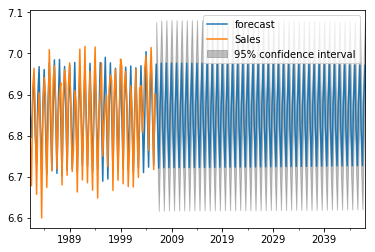

In [40]:
results_ARIMA.plot_predict(1,264)
x = results_ARIMA.forecast(steps = 120)

In [41]:
x[1]

array([0.0518101 , 0.05181321, 0.05300254, 0.05304483, 0.05310356,
       0.05311267, 0.05311488, 0.05313201, 0.05313229, 0.05314684,
       0.05314685, 0.05316205, 0.0531621 , 0.05317712, 0.05317716,
       0.05319221, 0.05319225, 0.05320729, 0.05320733, 0.05322236,
       0.05322241, 0.05323742, 0.05323747, 0.05325248, 0.05325254,
       0.05326753, 0.05326759, 0.05328257, 0.05328263, 0.0532976 ,
       0.05329767, 0.05331263, 0.05331271, 0.05332765, 0.05332773,
       0.05334266, 0.05334275, 0.05335767, 0.05335776, 0.05337267,
       0.05337276, 0.05338766, 0.05338776, 0.05340264, 0.05340275,
       0.05341762, 0.05341773, 0.05343259, 0.05343271, 0.05344755,
       0.05344768, 0.05346251, 0.05346264, 0.05347746, 0.0534776 ,
       0.0534924 , 0.05349255, 0.05350733, 0.05350749, 0.05352226,
       0.05352242, 0.05353718, 0.05353735, 0.0535521 , 0.05355227,
       0.053567  , 0.05356718, 0.0535819 , 0.05358209, 0.05359679,
       0.05359699, 0.05361168, 0.05361188, 0.05362656, 0.05362